**FPR**

*Rubén Martínez Sisó, Lucía Cárdenas Palacios*

---

# 1.    Introduction

(...)

# 2.    Problem Definition

(...)

# 3.    Prepare The Data

## 3.1  Dependencies

In [708]:
# %pip install pd
# %pip install matplotlib
# %pip install plotly
# %pip install numpy
# %pip install requests
# %pip install seaborn
# %pip install torch

In [709]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import plotly.express as px
import plotly.graph_objects as go
import requests
import scipy
import seaborn as sns

import random
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import numpy as numpy

from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from os import sep
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score as accuracy_score
from sklearn.metrics import confusion_matrix as confusion_matrix
# Start writing code here...

## 3.2  Data Loading

In [710]:
PATH_DATA_RAW = 'data_fitness' + sep + 'raw' + sep
fitness_raw = pd.read_csv(PATH_DATA_RAW + 'fitness analysis.csv')
pd.DataFrame()

""


## 3.3  Fitness Simplification

In [711]:
fitness_raw['How do you describe your current level of fitness ?'].value_counts()

Good         220
Average      195
Unfit         54
Very good     53
Perfect       23
Name: How do you describe your current level of fitness ?, dtype: int64

In [712]:
fitness_mod = fitness_raw.replace({'How do you describe your current level of fitness ?': {"Unfit": 1, "Average": 1, "Good": 2, "Very good": 3, "Perfect": 3}})
fitness_mod['How do you describe your current level of fitness ?'].value_counts()

1    249
2    220
3     76
Name: How do you describe your current level of fitness ?, dtype: int64

# 4.    Data Understanding

## 4.1  First Look

In [713]:
fitness_mod.head()

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,2,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,3,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,2,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,2,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,1,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


In [714]:
fitness_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   Timestamp                                                                                                              545 non-null    object
 1   Your name                                                                                                              545 non-null    object
 2   Your gender                                                                                                            545 non-null    object
 3   Your age                                                                                                               545 non-null    object
 4   How impo

In [715]:
fitness_mod.isna().sum()

Timestamp                                                                                                                0
Your name                                                                                                                0
Your gender                                                                                                              0
Your age                                                                                                                 0
How important is exercise to you ?                                                                                       0
How do you describe your current level of fitness ?                                                                      0
How often do you exercise?                                                                                               0
What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)              0
What form(s) of 

## 4.2  Column Study

### 4.2.1   Name of the person attending the survey

### 4.2.2   Gender of the person attending the survey

### 4.2.3   Age of the person attending the survey

### 4.2.4   How important is an exercise to you on the scale of 1 to 5

### 4.2.5   How do you describe your current level of fitness?

### 4.2.6   How often do you exercise?

### 4.2.7   What barriers, if any, prevent you from exercising more regularly?

### 4.2.8   What forms of exercise do you currently participate in?

### 4.2.9   Do you exercise... ?

### 4.2.10  What time of the day do you prefer to exercise?

### 4.2.11  How long do you spend exercising per day?

### 4.2.12  Would you say, you eat a healthy balanced diet?

### 4.2.13  What prevents you from eating a healthy balanced diet, if any?

### 4.2.14  How healthy do you consider yourself on a scale of 1 to 5?

### 4.2.15  Have you recommended your friends to follow a fitness routine? 

### 4.2.16  Have you ever purchased fitness equipment?

### 4.2.17  What motivates you to exercise?

## 4.3  Relevant Observations

(...)

# 5.    First Iteration

* Drop colums with unique answers
* Drop columns with multiple answers
* Change every string value to integer value
* Ignore outliers
* Train-test Split
* Logistic Regression model

## 5.1  Data Preparation

### 5.1.1   Drop colums with unique answers

In [716]:
fitness1_1 = fitness_mod.copy(deep = True)

fitness1_1 = fitness1_1.drop(['Timestamp'], axis=1)
fitness1_1 = fitness1_1.drop(['Your name '], axis=1)

### 5.1.2   Drop columns with multiple answers

In [717]:
fitness1_2 = fitness1_1.copy(deep = True)

fitness1_2 = fitness1_2.drop(['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'], axis=1)
fitness1_2 = fitness1_2.drop(['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'], axis=1)
fitness1_2 = fitness1_2.drop(['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'], axis=1)
fitness1_2 = fitness1_2.drop(['What motivates you to exercise?         (Please select all that applies )'], axis=1)

### 5.1.3  Change every string value to integer value

In [718]:
# "4. How important is an exercise to you on the scale of 1 to 5" with integer values
# "14. How healthy do you consider yourself on a scale of 1 to 5?"
# "5. How do you describe your current level of fitness?" replaced at the top of the project

fitness1_3 = fitness1_2.copy(deep = True)

fitness1_3 = fitness1_3.replace({'Your gender ': {"Female": 0, "Male": 1}})
fitness1_3 = fitness1_3.replace({'Your age ': {"19 to 25": 0, "15 to 18": 1, "40 and above": 2, "30 to 40": 3, "26 to 30": 4}})
fitness1_3 = fitness1_3.replace({'How often do you exercise?': {"1 to 2 times a week": 0, "Never": 1, "2 to 3 times a week": 2, "3 to 4 times a week": 3, "Everyday": 4, "5 to 6 times a week": 5}})
fitness1_3 = fitness1_3.replace({'Do you exercise ___________ ?': {"Alone": 0, "I don't really exercise": 1, "With a friend": 2, "With a group": 3, "Within a class environment": 4}})
fitness1_3 = fitness1_3.replace({'What time if the day do you prefer to exercise?': {"Early morning": 0, "Evening": 1, "Afternoon": 2}})
fitness1_3 = fitness1_3.replace({'How long do you spend exercising per day ?': {"30 minutes": 0, "1 hour": 1, "I don't really exercise": 2, "2 hours": 3, "3 hours and above": 4}})
fitness1_3 = fitness1_3.replace({'Would you say you eat a healthy balanced diet ?': {"Not always": 0, "Yes": 1, "No": 2, "2 hours": 3}})
fitness1_3 = fitness1_3.replace({'Have you ever recommended your friends to follow a fitness routine?': {"Yes": 0, "No": 1}})
fitness1_3 = fitness1_3.replace({'Have you ever purchased a fitness equipment?': {"Yes": 0, "No": 1}})

### 5.1.4   Train-test Split

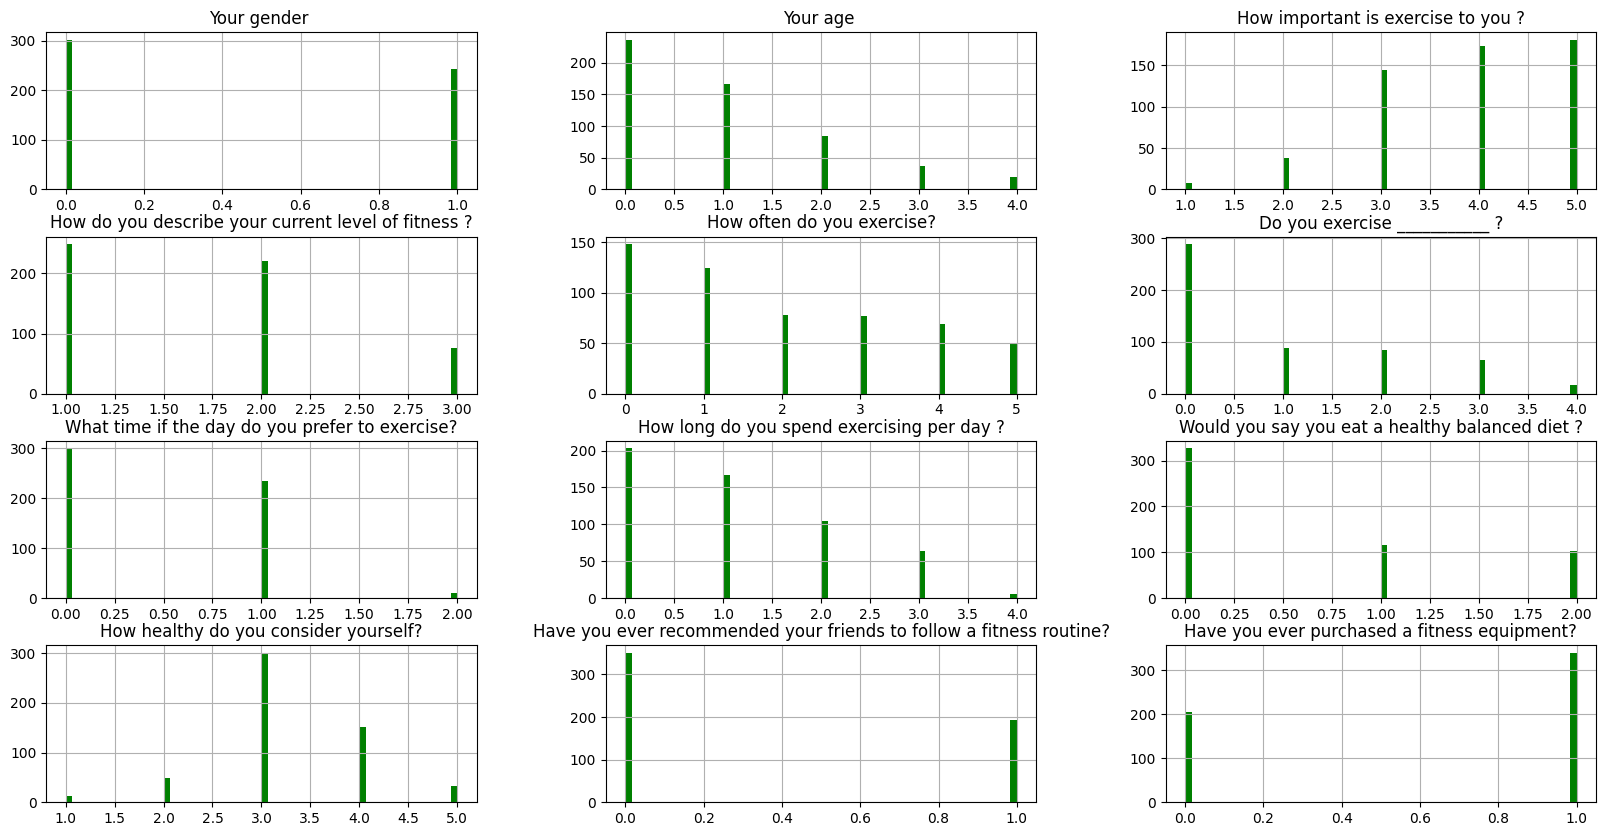

In [719]:
fitness1_3.hist(bins=60, figsize=(20,10), color='green')
plt.show()

1    249
2    220
3     76
Name: How do you describe your current level of fitness ?, dtype: int64

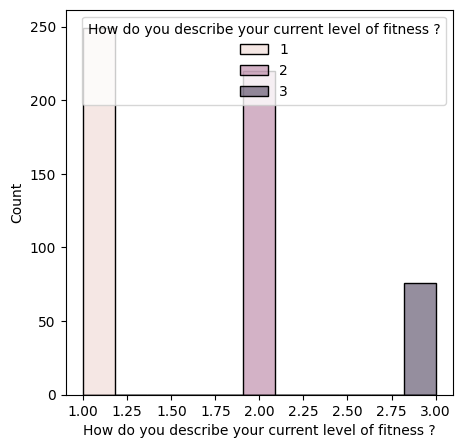

In [720]:
plt.figure(figsize=(5,5))
sns.histplot(data = fitness1_3, x = 'How do you describe your current level of fitness ?', hue = 'How do you describe your current level of fitness ?')
fitness1_3['How do you describe your current level of fitness ?'].value_counts()

In [721]:
x = fitness1_3.drop(['How do you describe your current level of fitness ?'], axis=1)
y = fitness1_3['How do you describe your current level of fitness ?']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

## 5.2  Modeling & Evaluation

### 5.2.1   Logistic Regression

In [722]:
lr = LogisticRegression(random_state=40)
print(lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 40, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [723]:
lr.fit(X_train,y_train)

C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=40)

In [724]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: {:d}%'.format(int(accuracy * 100)))

Accuracy: 57%


### 5.2.2  Performance Evaluation

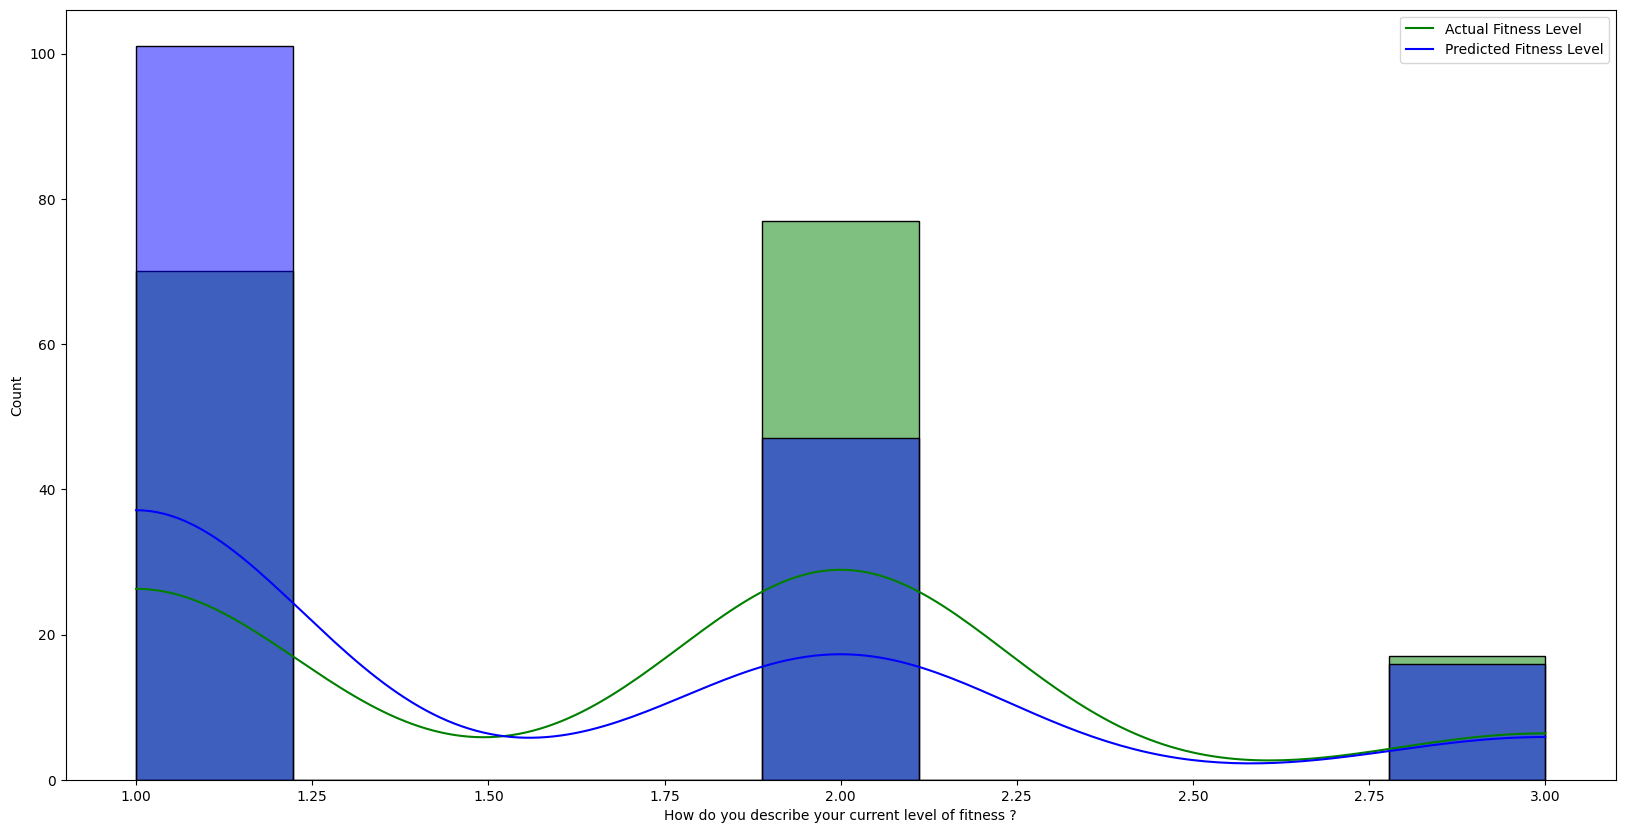

In [725]:
plt.figure(figsize=(20,10))
sns.histplot(data = y_test, kde = True, color='g')
sns.histplot(data = y_pred, kde = True, color='b')
plt.legend(labels=["Actual Fitness Level","Predicted Fitness Level"])

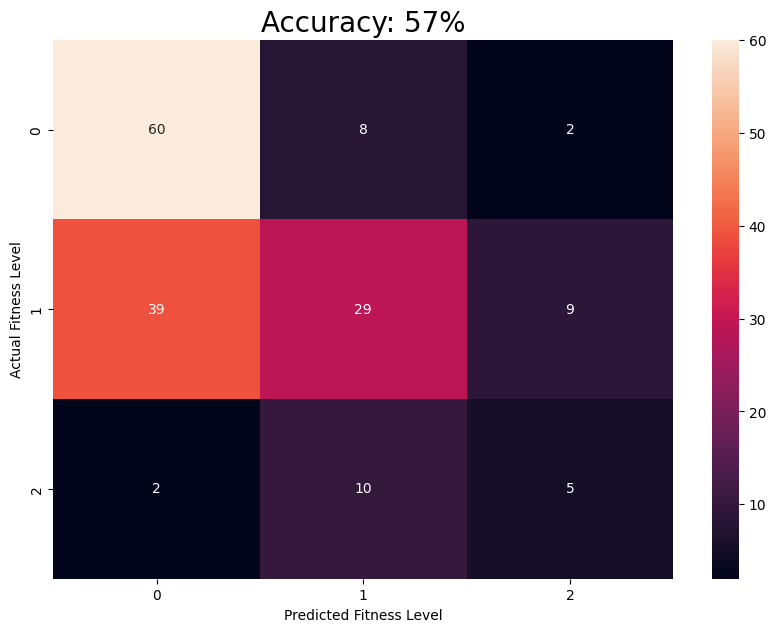

In [726]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.xlabel('Predicted Fitness Level')
plt.ylabel('Actual Fitness Level')
plt.title('Accuracy: {:d}%'.format(int(accuracy * 100)), size = 20)
plt.show()

## 5.3  Following Iteration

(...)

# 6.    Second Iteration

* Drop colums with unique answers
* Treat columns with multiple answers
* Change every string value to integer value
* Outliers treatment
* Decision Tree model

## 6.1  Data Preparation

### 6.1.1   Drop colums with unique answers

In [727]:
fitness2_1 = fitness_mod.copy(deep = True)

fitness2_1 = fitness2_1.drop(['Timestamp'], axis=1)
fitness2_1 = fitness2_1.drop(['Your name '], axis=1)

### 6.1.2   Treat columns with multiple answer

In [728]:
#fitness1_2 = fitness1_2.drop(['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'], axis=1)

fitness2_2 = fitness2_1.copy(deep = True)

fitness2_2 = fitness2_2.drop(['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'], axis=1)
fitness2_2 = fitness2_2.drop(['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'], axis=1)
fitness2_2 = fitness2_2.drop(['What motivates you to exercise?         (Please select all that applies )'], axis=1)

In [729]:
fitness2_2 = fitness2_2.replace({'What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)': 
{"Temptation and cravings": 0,
 "Lack of time": 1,
  "Ease of access to fast food;Temptation and cravings": 3,
  "Ease of access to fast food": 3,
  "I have a balanced diet": 4,
  "Lack of time;Temptation and cravings": 1,
  "Cost": 5,
  "Lack of time;Ease of access to fast food;Temptation and cravings": 3,
  "Lack of time;Ease of access to fast food": 1,
  "Cost;Ease of access to fast food": 5,
  "Lack of time;Cost": 5,
  "Cost;Ease of access to fast food;Temptation and cravings": 3,
  "Lack of time;Cost;Ease of access to fast food;Temptation and cravings": 3,
  "Cost;Temptation and cravings": 5,
  "Ease of access to fast food;I have a balanced diet": 4,
  "I do not measure. I can't say for sure if my diet is balanced. ": 3,
  "Alcohol does me a good diet": 4,
  "Lack of time;Cost;Temptation and cravings": 3,
  "Rarely eat fast food": 4,
  "Temptation and cravings;I have a balanced diet": 4,
  "i don't have a proper diet": 3,
  "Social circle ": 4
  }})

fitness2_2['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'].value_counts()

0    210
3    149
1    112
4     48
5     26
Name: What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply), dtype: int64

### 6.1.3   Change every string value to integer value

In [730]:
# "4. How important is an exercise to you on the scale of 1 to 5" with integer values
# "14. How healthy do you consider yourself on a scale of 1 to 5?"
# "5. How do you describe your current level of fitness?" replaced at the top of the project

fitness2_3 = fitness2_2.copy(deep = True)

fitness2_3 = fitness2_3.replace({'Your gender ': {"Female": 0, "Male": 1}})
fitness2_3 = fitness2_3.replace({'Your age ': {"19 to 25": 0, "15 to 18": 1, "40 and above": 2, "30 to 40": 3, "26 to 30": 4}})
fitness2_3 = fitness2_3.replace({'How often do you exercise?': {"1 to 2 times a week": 0, "Never": 1, "2 to 3 times a week": 2, "3 to 4 times a week": 3, "Everyday": 4, "5 to 6 times a week": 5}})
fitness2_3 = fitness2_3.replace({'Do you exercise ___________ ?': {"Alone": 0, "I don't really exercise": 1, "With a friend": 2, "With a group": 3, "Within a class environment": 4}})
fitness2_3 = fitness2_3.replace({'What time if the day do you prefer to exercise?': {"Early morning": 0, "Evening": 1, "Afternoon": 2}})
fitness2_3 = fitness2_3.replace({'How long do you spend exercising per day ?': {"30 minutes": 0, "1 hour": 1, "I don't really exercise": 2, "2 hours": 3, "3 hours and above": 4}})
fitness2_3 = fitness2_3.replace({'Would you say you eat a healthy balanced diet ?': {"Not always": 0, "Yes": 1, "No": 2, "2 hours": 3}})
fitness2_3 = fitness2_3.replace({'Have you ever recommended your friends to follow a fitness routine?': {"Yes": 0, "No": 1}})
fitness2_3 = fitness2_3.replace({'Have you ever purchased a fitness equipment?': {"Yes": 0, "No": 1}})

### 6.1.4   Outliers treatment

In [731]:
fitness2_4 = fitness2_3.copy(deep = True)

In [732]:
fitness2_4_pc = fitness2_4.copy(deep = True)
Q1 = fitness2_4_pc.quantile(0.25) # 0.25
Q3 = fitness2_4_pc.quantile(0.75) # 0.75
IQR = Q3 - Q1
print(IQR)

Your gender                                                                                                              1.0
Your age                                                                                                                 2.0
How important is exercise to you ?                                                                                       2.0
How do you describe your current level of fitness ?                                                                      1.0
How often do you exercise?                                                                                               3.0
Do you exercise ___________ ?                                                                                            2.0
What time if the day do you prefer to exercise?                                                                          1.0
How long do you spend exercising per day ?                                                                               2.0


In [733]:
fitness2_4_pc_out = fitness2_4_pc[~((fitness2_4_pc < (Q1 - 1.5 * IQR)) |(fitness2_4_pc > (Q3 + 1.5 * IQR))).any(axis=1)]


In [734]:
i, _ = fitness2_4.shape
o, _ = fitness2_4_pc_out.shape
print("Removed", i-o,"rows")
print("Rows count reduced from", i, "to", o,"resulting in", int((o/i)*100), "% of the initial rows" )

Removed 13 rows
Rows count reduced from 545 to 532 resulting in 97 % of the initial rows


In [735]:
fitness2_4 = fitness2_4_pc_out.copy(deep = True)

### 6.1.5   Train-test Split

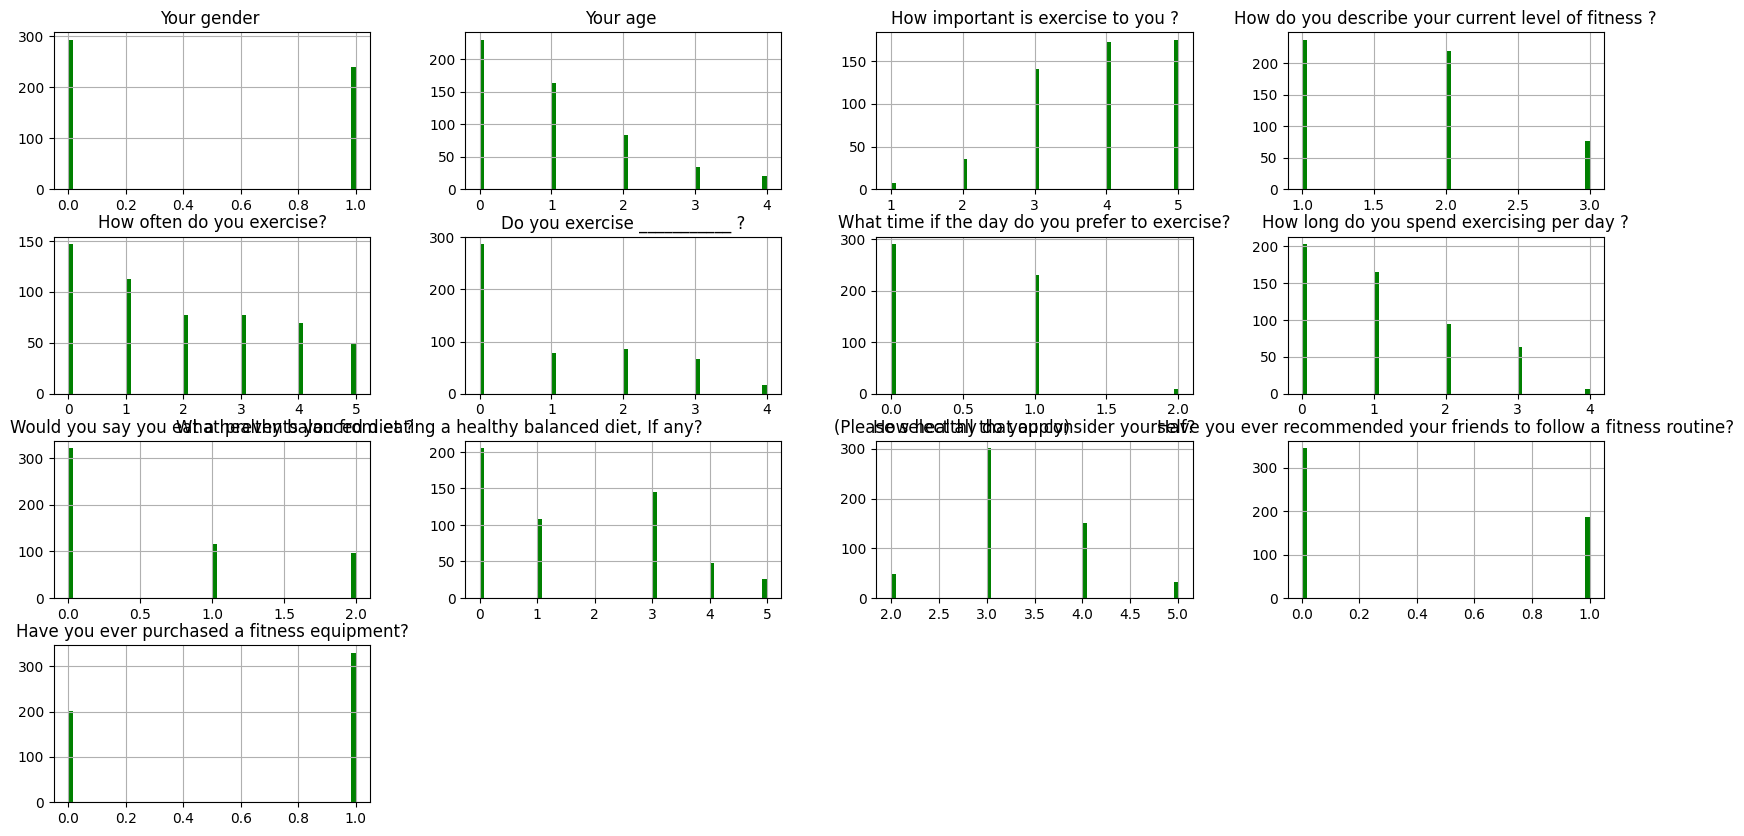

In [736]:
fitness2_4.hist(bins=60, figsize=(20,10), color='green')
plt.show()

1    237
2    219
3     76
Name: How do you describe your current level of fitness ?, dtype: int64

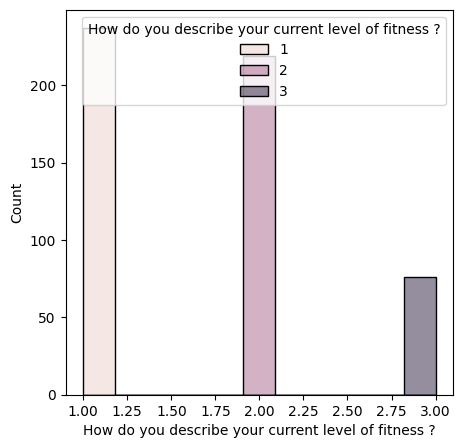

In [737]:
plt.figure(figsize=(5,5))
sns.histplot(data = fitness2_4, x = 'How do you describe your current level of fitness ?', hue = 'How do you describe your current level of fitness ?')
fitness2_4['How do you describe your current level of fitness ?'].value_counts()

In [738]:
x = fitness2_4.drop(['How do you describe your current level of fitness ?'], axis=1)
y = fitness2_4['How do you describe your current level of fitness ?']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

## 6.2  Modeling & Evaluation

### 6.2.1   Decision Tree

In [739]:
dt = DecisionTreeClassifier(criterion='gini',splitter='best')
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [740]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [741]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: {:d}%'.format(int(accuracy * 100)))

Accuracy: 52%


### 6.2.2  Performance Evaluation

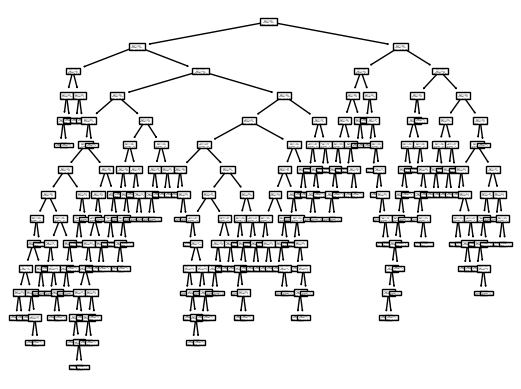

In [742]:
tree.plot_tree(dt)
plt.show()

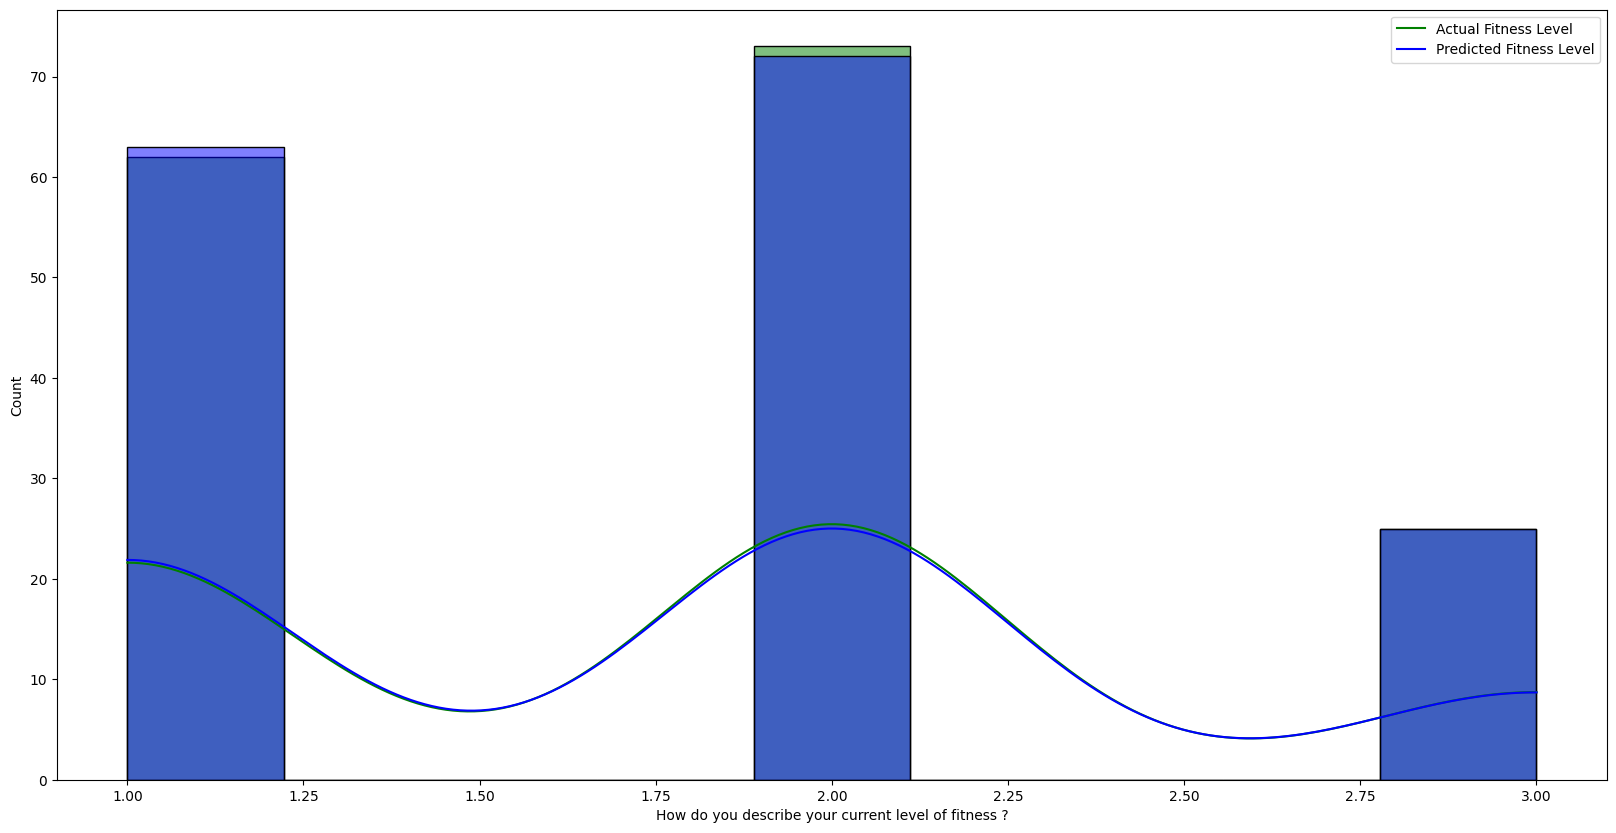

In [743]:
plt.figure(figsize=(20,10))
sns.histplot(data = y_test, kde = True, color='g')
sns.histplot(data = y_pred, kde = True, color='b')
plt.legend(labels=["Actual Fitness Level","Predicted Fitness Level"])

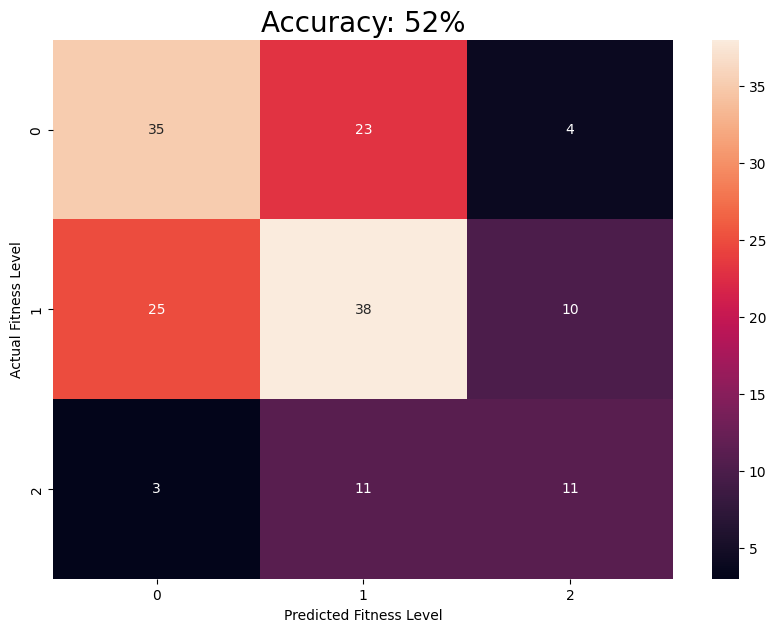

In [744]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.xlabel('Predicted Fitness Level')
plt.ylabel('Actual Fitness Level')
plt.title('Accuracy: {:d}%'.format(int(accuracy * 100)), size = 20)
plt.show()

### 6.3  Following Iteration

(...)

# 7.    Third Iteration

* Same data treatment as the previous iteration
* Random Forest model

## 7.1  Data Preparation

(...)

## 7.2  Modeling & Evaluation

### 7.2.1   Random Forest

In [745]:
rfc = RandomForestClassifier(n_estimators=1000,random_state=0)
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [746]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [747]:
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy: {:d}%'.format(int(accuracy_rfc * 100)))

Accuracy: 53%


### 7.2.2  Performance Evaluation

# TESTEO: NEURAL NETWORK

In [748]:
fitness_nn = np.loadtxt(PATH_DATA_RAW + 'fitness analysis.csv', delimiter= ",", skiprows=1, usecols=range(1,17))

ValueError: could not convert string to float: '"Parkavi"'